# Mini Project 1

### Luis Pereda

In [4]:
# This is for ECE580: Intro to machine learning Spring 2020 in Duke
# This is translated to Python from show_chanWeights.m file provided by Prof. Li by 580 TAs

# import ext libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.misc import imread   # Make Sure you install the required packages like Pillow and scipy

def imgRead(fileName):
    """
    load the input image into a matrix
    :param fileName: name of the input file
    :return: a matrix of the input image
    Examples: imgIn = imgRead('lena.bmp')
    """
    imgIn = plt.imread(fileName)
    return imgIn


def imgShow(imgOut):
    """
    show the image saved in a matrix
    :param imgOut: a matrix containing the image to show
    :return: None
    """
    imgOut = np.uint8(imgOut)
    plt.figure(figsize=[20,20])
    plt.imshow(imgOut, cmap = 'gray')


def imgRecover(imgIn, blkSize, numSample):
    """
    Recover the input image from a small size samples
    :param imgIn: input image
    :param blkSize: block size
    :param numSample: how many samples in each block
    :return: recovered image
    """
    ##### Your Implementation here

    return None

"""
if __name__ == '__main__':
    a = imgRead('lena.bmp')
    print(np.shape(a))
    imgShow(a)
    print(a)
"""

"\nif __name__ == '__main__':\n    a = imgRead('lena.bmp')\n    print(np.shape(a))\n    imgShow(a)\n    print(a)\n"

In [5]:
fishing_boat = imgRead("fishing_boat.bmp")

In [6]:
nature = imgRead("nature.bmp")

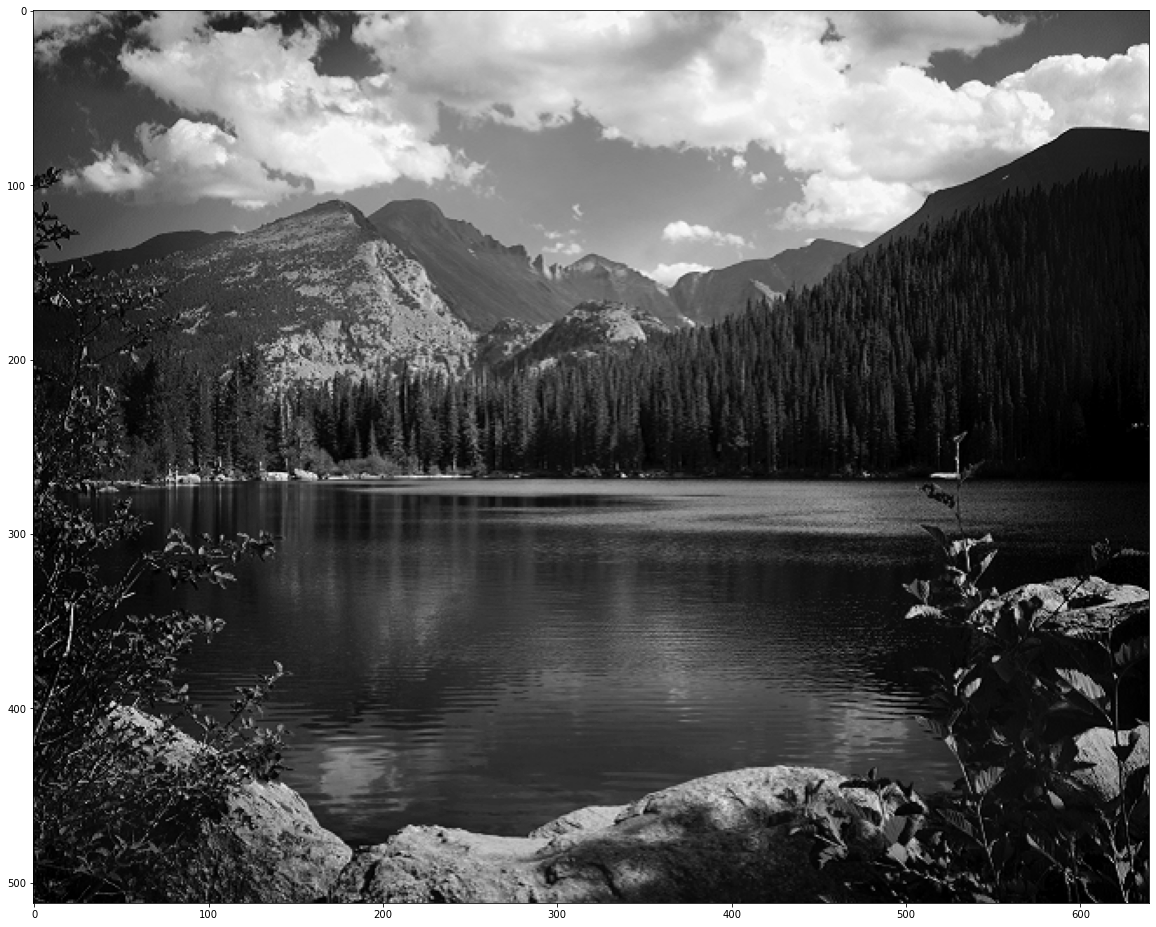

In [7]:
imgShow(nature)

In [8]:
(fishing_boat[1:3, :4])

array([[177, 176, 177, 178],
       [176, 176, 176, 178]], dtype=uint8)

In [10]:
import random

def sample_block(block, num_samples):
#     block = blocks[1]
    indices = np.linspace(0, np.prod(block.shape) - 1, np.prod(block.shape))
    random.shuffle(indices)
    indices = indices[0:(len(indices) - num_samples)]
    indices = [int(x) for x in indices]
    ret = block.flatten()
    ret[indices] = 0
    ret = ret.reshape([block.shape[0], block.shape[1]])
    return ret

In [16]:
def get_blocks_from_image(image, N):
    blocks = []
    for i in range(image.shape[0] // N):
        for j in range(image.shape[1] // N):
            blocks.append(image[(i * N):((i + 1) * N), (j * N):((j + 1) * N)])
    return np.array(blocks)

In [22]:
blocks = get_blocks_from_image(fishing_boat, 8)
blocks.shape

(600, 8, 8)

In [26]:
fishing_boat.shape

(200, 192)

In [52]:
x = fishing_boat.shape[1] / 8
x.is_integer()

True

In [39]:
# Get sampled image where num_samples are taken from each NXN block
def get_sampled_image(image, N, num_samples):
    blocks = get_blocks_from_image(image, N)
    
    block_count = 0
    new_blocks = np.ndarray(image.shape)
    col_reps = image.shape[1] / N
    
    if not col_reps.is_integer():
        print("Cannot split image into {} by {} blocks, select a new value N".format(N, N))
    
    else:
        col_reps = int(col_reps)
        for block in blocks:
            sample = sample_block(block, num_samples)

            # For row in block
            for i in range(block.shape[0]):
                new_blocks[N * (block_count // col_reps) + i][N * (block_count % col_reps) : N * (block_count % col_reps + 1)] = sample[i]
            block_count += 1
        return new_blocks

In [48]:
new_blocks = get_sampled_image(nature, 16, 256)

In [49]:
list(np.subtract(nature, new_blocks))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

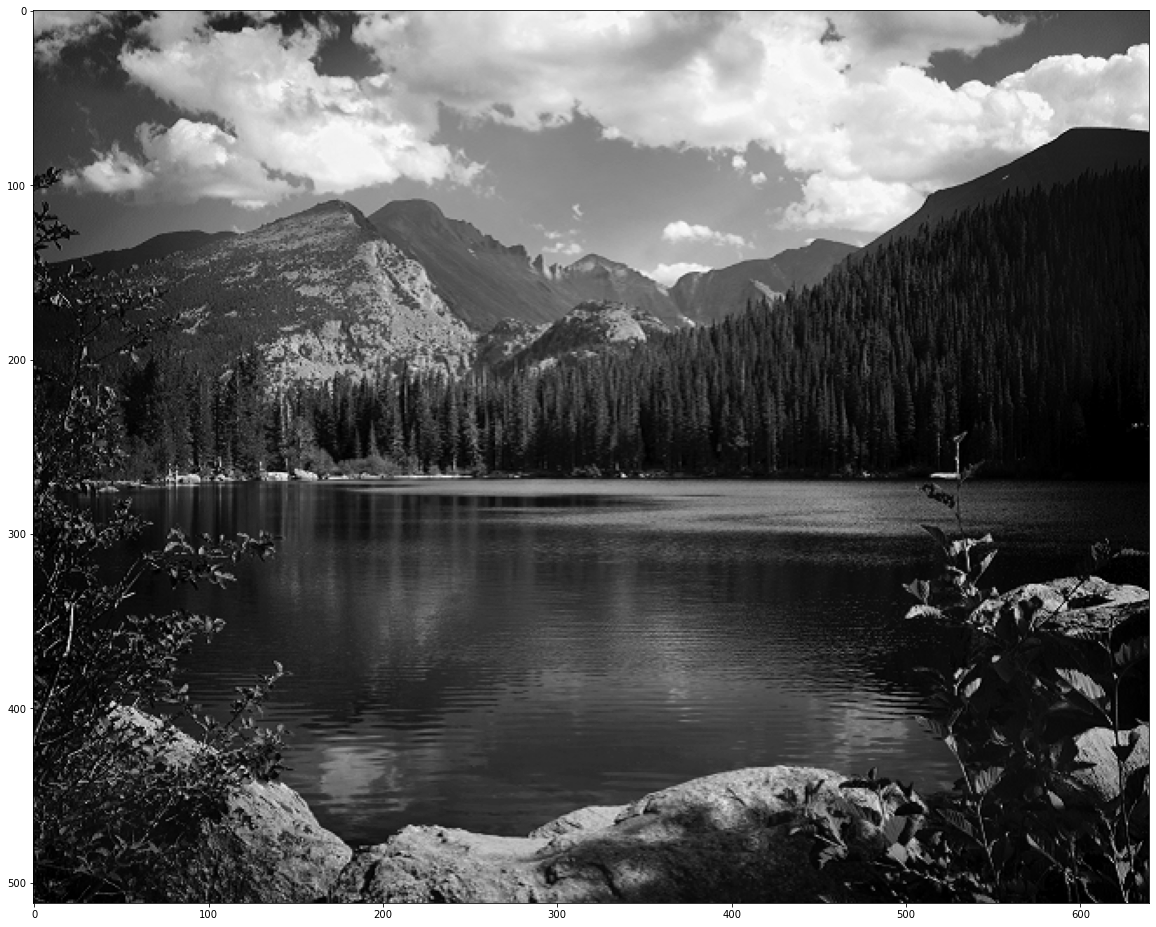

In [50]:
imgShow(new_blocks)

Up to this point have shown I can complete up to the first checkpoint: able to split image into NXN blocks and sample n samples from any of these blocks. 

In [273]:
from sklearn.linear_model import Lasso

In [274]:
def rasterize(mat):
    return mat.flatten()

In [275]:
def find_T_col(u, v, P, Q):
    T = np.ndarray([P,Q])
    for x in range(1, P + 1):
        for y in range(1, Q + 1):
            if u == 1:
                alpha = np.sqrt(1/P)
            else:
                alpha = np.sqrt(2/P)
            if v == 1: 
                beta = np.sqrt(1/Q)
            else:
                beta = np.sqrt(2/Q)
            term1 = np.cos(np.pi * (2 * x - 1) * (u - 1) / (2 * P))
            term2 = np.cos(np.pi * (2 * y - 1) * (v - 1) / (2 * Q))

            T[x-1][y-1] = alpha * beta * term1 * term2
    return rasterize(T)

In [276]:
def find_T_matrix(P, Q):
    T_mat = []
    for u in range(1, P + 1):
        for v in range(1, Q + 1):
            T_col = find_T_col(u, v, P, Q)
            T_mat.append(T_col)
    return np.transpose(np.array(T_mat).reshape([P ** 2, Q ** 2]))

In [277]:
T = find_T_matrix(8, 8)

In [278]:
list(T)

[array([0.125     , 0.17337998, 0.16332037, 0.14698445, 0.125     ,
        0.09821187, 0.06764951, 0.03448742, 0.17337998, 0.24048494,
        0.22653186, 0.20387329, 0.17337998, 0.13622378, 0.09383257,
        0.04783543, 0.16332037, 0.22653186, 0.21338835, 0.19204444,
        0.16332037, 0.12831999, 0.08838835, 0.04505999, 0.14698445,
        0.20387329, 0.19204444, 0.17283543, 0.14698445, 0.11548494,
        0.07954741, 0.04055292, 0.125     , 0.17337998, 0.16332037,
        0.14698445, 0.125     , 0.09821187, 0.06764951, 0.03448742,
        0.09821187, 0.13622378, 0.12831999, 0.11548494, 0.09821187,
        0.07716457, 0.05315188, 0.02709659, 0.06764951, 0.09383257,
        0.08838835, 0.07954741, 0.06764951, 0.05315188, 0.03661165,
        0.01866446, 0.03448742, 0.04783543, 0.04505999, 0.04055292,
        0.03448742, 0.02709659, 0.01866446, 0.00951506]),
 array([ 0.125     ,  0.14698445,  0.06764951, -0.03448742, -0.125     ,
        -0.17337998, -0.16332037, -0.09821187,  0.173

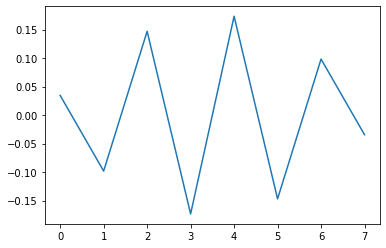

In [279]:
plt.plot(T[:, 8 - 1][0:8])

In [327]:
fishing_boat_blocks = get_blocks_from_image(fishing_boat, 8)
block = sample_block(fishing_boat_blocks[0], 10)
block = rasterize(block)

In [328]:
block

array([  0,   0,   0, 179, 179,   0,   0,   0,   0,   0, 177,   0,   0,
       178, 178,   0,   0,   0,   0,   0, 177,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 181,   0, 179,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 178,   0,   0,   0,   0, 182,   0],
      dtype=uint8)

In [329]:
B = np.array([x for x in block if x != 0])
A = np.array([row for row, x in zip(T, block) if x != 0])

In [330]:
DC = A[:, 0]
A = A[:, 1:]

In [331]:
DCT_coef_predictor = Lasso(alpha = 1e-3)
DCT_coef_predictor.fit(X = A, y = B.flatten())

Lasso(alpha=0.001)

In [339]:
DCT_coef_predictor.coef_

array([-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.81970631, -0.        , -3.67394532,  0.        ,  0.        ,
       -0.        ,  0.96479847, -0.        , -0.        , -2.37263382,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.27119853, -0.        ,  0.        ,  0.        ,  3.95051327,
       -3.13943791, -0.        ,  0.        , -4.383948  , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.17598988,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  1.78508302,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ])

In [333]:
DC_term = [DCT_coef_predictor.intercept_ / DC[0]]

In [334]:
DC_term

[1429.462943466209]

In [337]:
DCT_coefs = np.array(DC_term + list(DCT_coef_predictor.coef_))

In [338]:
DCT_coefs

array([ 1.42946294e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.19706312e-01, -0.00000000e+00,
       -3.67394532e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        9.64798471e-01, -0.00000000e+00, -0.00000000e+00, -2.37263382e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.71198527e-01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.95051327e+00, -3.13943791e+00, -0.00000000e+00,
        0.00000000e+00, -4.38394800e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.75989884e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.78508302e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

Up to this point done with checkpoint 2: can estimate DCT for a single block 

In [340]:
lambda_candidates = np.logspace(-6, 6, 50)

In [341]:
lambda_candidates

array([1.00000000e-06, 1.75751062e-06, 3.08884360e-06, 5.42867544e-06,
       9.54095476e-06, 1.67683294e-05, 2.94705170e-05, 5.17947468e-05,
       9.10298178e-05, 1.59985872e-04, 2.81176870e-04, 4.94171336e-04,
       8.68511374e-04, 1.52641797e-03, 2.68269580e-03, 4.71486636e-03,
       8.28642773e-03, 1.45634848e-02, 2.55954792e-02, 4.49843267e-02,
       7.90604321e-02, 1.38949549e-01, 2.44205309e-01, 4.29193426e-01,
       7.54312006e-01, 1.32571137e+00, 2.32995181e+00, 4.09491506e+00,
       7.19685673e+00, 1.26485522e+01, 2.22299648e+01, 3.90693994e+01,
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.68986603e+05, 1.00000000e+06])

In [365]:
import random 

fishing_boat_blocks = get_blocks_from_image(fishing_boat, 8)
block = sample_block(fishing_boat_blocks[0], 40)
block = rasterize(block)
b = pd.DataFrame([x for x in block if x != 0])
# for a in lambda_candidates:
indices = set(range(0, 40))
test_indices = set(random.sample(range(0, 40), 40 // 6))
train_indices = indices - test_indices

In [366]:
test_indices

{0, 2, 3, 9, 11, 32}

In [ ]:
train_indices

In [372]:
b

0
0  -80
1  -79
2  -78
3  -77
4  -75
5  -79
6  -80
7  -78
8  -80
9  -78
10 -79
11 -78
12 -79
13 -79
14 -79
15 -78
16 -76
17 -76
18 -77
19 -78
20 -79
21 -80
22 -75
23 -77
24 -77
25 -79
26 -72
27 -80
28 -77
29 -77
30 -78
31 -74
32 -78
33 -77
34 -78
35 -77
36 -75
37 -73
38 -76
39 -74

In [375]:
test_values = b.iloc[np.sort(list(test_indices))]

In [376]:
train_values = b.iloc[np.sort(list(train_indices))]